In [1]:
import pandas

In [2]:
import matplotlib.pyplot as plt

In [3]:
#1,a,

In [4]:
b=[[8.3,6.4,3.4,3.8,2.6,11.6,1.2,2.5,1.6],[210,180,130,170,130,210,120,150,140]]

Text(0.5, 0, 'REI')

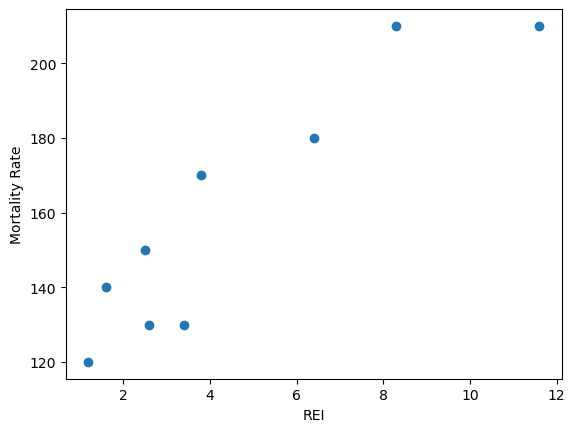

In [5]:
plt.plot(b[0],b[1],'o')
plt.ylabel("Mortality Rate")
plt.xlabel("REI")

In [6]:
a=pandas.DataFrame(data=b)

In [7]:
import scipy

In [8]:
scipy.stats.spearmanr(b,axis=1)

SpearmanrResult(correlation=0.8571731229523383, pvalue=0.00314393098033448)

In [9]:
scipy.stats.pearsonr(b[0],b[1])

PearsonRResult(statistic=0.9174852467389412, pvalue=0.0004898156953144436)

In [10]:
a=a.T

In [11]:
a.describe()

,0,1
count,9.000000,9.000000
mean,4.600000,160.000000
std,3.481738,34.278273
min,1.200000,120.000000
25%,2.500000,130.000000
50%,3.400000,150.000000
75%,6.400000,180.000000
max,11.600000,210.000000


In [12]:
import statsmodels.tools.tools

In [13]:
x=statsmodels.tools.tools.add_constant(a[0])

In [14]:
y=a[1]

In [15]:
import statsmodels.regression.linear_model

In [16]:
model=statsmodels.regression.linear_model.OLS(y,x).fit()

In [17]:
y_pred=model.predict(x)

In [18]:
intercept,slope=model.params

In [19]:
import sklearn.metrics

In [20]:
mse=sklearn.metrics.mean_squared_error(y,y_pred)

In [21]:
r2=sklearn.metrics.r2_score(y,y_pred)

In [22]:
r2

0.8417791779836159

In [23]:
intercept

118.4491647762425

In [24]:
slope#beta

9.032790266034226

In [25]:
model.summary()

C:\Users\chexi\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      1   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     37.24
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           0.000490
Time:                        23:44:01   Log-Likelihood:                -35.754
No. Observations:                   9   AIC:                             75.51
Df Residuals:                       7   BIC:                             75.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        118.4492      8.365     14.161      0.000      98.670     138.228
0              9.0328      1.480      6.103      0.000       5.533      12.533
==============================================================================
Omnibus:                        2.479   Durbin-Watson:                   2.163
Prob(Omnibus):                  0.290   Jarque-Bera (JB):                0.861
Skew:                          -0.055   Prob(JB):                        0.650
Kurtosis:                       1.489   Cond. No.                         9.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
import numpy

Text(0.5, 0, 'REI')

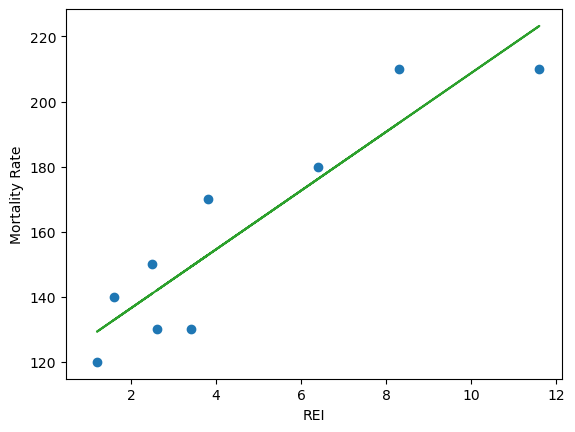

In [27]:
plt.plot(b[0],b[1],'o')
e=numpy.linspace(0,8,9)
plt.plot(x,x*slope+intercept)
plt.ylabel("Mortality Rate")
plt.xlabel("REI")

In [28]:
StanR=scipy.stats.zscore(model.predict(x)-a[1])

Text(0.5, 0, 'order')

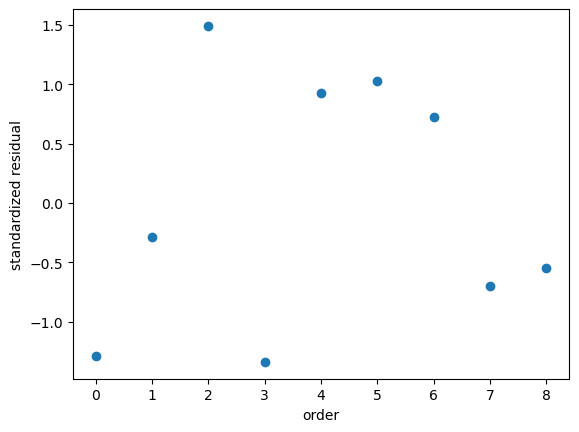

In [29]:
plt.plot(StanR,'o')
plt.ylabel("standardized residual")
plt.xlabel("order")

In [30]:
c=x.sort_values(0)

In [31]:
d=a.sort_values(0)

In [32]:
StanR1=scipy.stats.zscore(model.predict(c)-d[1])

Text(0.5, 0, 'order by size')

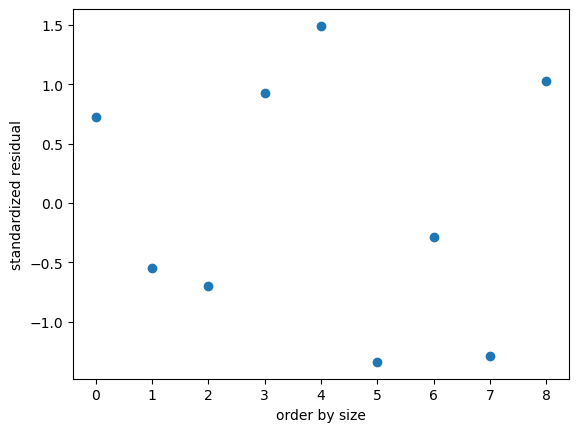

In [33]:
plt.plot(StanR1.reset_index()[0],'o')
plt.ylabel("standardized residual")
plt.xlabel("order by size")

In [34]:
int(1+3.322*numpy.log10(len(a)))

4

In [35]:
classRange=numpy.ptp(StanR)/4

In [36]:
hist,binE=numpy.histogram(StanR,bins=4)

In [37]:
binE

array([-1.34003397, -0.63239721,  0.07523955,  0.7828763 ,  1.49051306])

In [38]:
hist

array([3, 2, 1, 3], dtype=int64)

In [39]:
cdfV=scipy.stats.norm.cdf(binE+classRange,StanR.mean(),StanR.std())

In [40]:
cdfV

array([0.27551086, 0.52827586, 0.76977403, 0.92002938, 0.98088758])

In [41]:
binF=[]
for i in range(0,len(cdfV)-1):
    if i==0:
        f=cdfV[0]
    else:
        f=cdfV[i]-cdfV[i-1]
    binF.append(f)

In [42]:
binF=numpy.array(binF)

In [43]:
binF

array([0.27551086, 0.25276501, 0.24149816, 0.15025535])

In [44]:
exp=len(a)*binF

In [45]:
exp

array([2.47959772, 2.27488505, 2.17348347, 1.35229816])

In [46]:
chi=((hist-exp)**2/exp).sum()

In [47]:
1-scipy.stats.chi2.cdf(chi,1)

0.095231270684763

In [48]:
#1,b,

In [49]:
intercept+5*slope

163.61311610641363

In [50]:
98.67+5*5.533

126.33500000000001

In [51]:
138.288+5*12.533

200.953

In [52]:
#1,c,

Text(0.5, 0, 'REI')

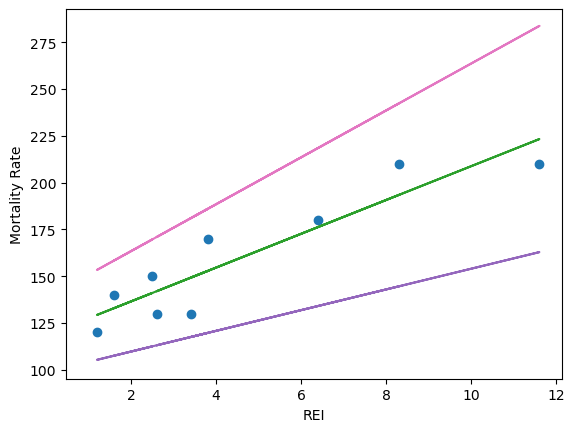

In [53]:
plt.plot(b[0],b[1],'o')
e=numpy.linspace(0,8,9)
plt.plot(x,x*slope+intercept)
plt.plot(x,x*5.533+98.67)
plt.plot(x,x*12.533+138.288)
plt.ylabel("Mortality Rate")
plt.xlabel("REI")

In [54]:
#2,i,

In [55]:
scipy.stats.poisson.pmf(2,2.6)

0.25104469436444854

In [56]:
1-scipy.stats.poisson.cdf(8,2.6*5)

0.9002420855164824

In [57]:
scipy.stats.poisson.cdf(19,26)

0.09682084979248273

In [58]:
#2,ii,a,

In [59]:
f=[33.75,33.05,34,33.81,33.46,34.02,33.58,33.27,33.49,33.2,34.62,33,33.54,34.12,33.84]

In [60]:
f=numpy.array(f)

In [61]:
f.mean()

33.65

In [62]:
#2,ii,b,

In [63]:
numpy.median(f)

33.58

In [64]:
int(1+3.322*numpy.log10(len(f)))

4

Text(0, 0.5, 'frequency')

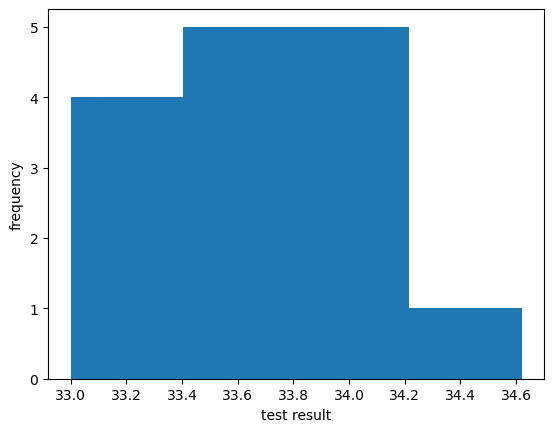

In [65]:
plt.hist(f,4)
plt.xlabel('test result')
plt.ylabel('frequency')

In [66]:
classRange=numpy.ptp(f)/4
hist,binE=numpy.histogram(f,bins=4)
cdfV=scipy.stats.norm.cdf(binE+classRange,f.mean(),f.std())
binF=[]
for i in range(0,len(cdfV)-1):
    if i==0:
        g=cdfV[0]
    else:
        g=cdfV[i]-cdfV[i-1]
    binF.append(g)
binF=numpy.array(binF)
exp=len(f)*binF
chi=((hist-exp)**2/exp).sum()
1-scipy.stats.chi2.cdf(chi,1)

0.5352930563890107

In [67]:
f.mean()+1.96*f.std()/len(f)**0.5

33.86474699946164

In [68]:
f.mean()-1.96*f.std()/len(f)**0.5

33.43525300053836

In [69]:
#2,ii,c,

In [70]:
scipy.stats.norm(f.mean(),f.std()).cdf(33)

0.0627882362247132

In [71]:
1-scipy.stats.norm(f.mean(),f.std()).cdf(35)

0.0007328472582639467

In [72]:
0.0627882362247132+0.0007328472582639467

0.06352108348297715

In [73]:
#3,i,

In [74]:
d1=[55,72,26,65,104,62,89,52,76,46,100,72,35]
d1=numpy.array(d1)

In [75]:
d1.mean()

65.6923076923077

In [76]:
d1.std()

22.52309794030125

In [77]:
d1.var()

507.28994082840234

In [78]:
d2=[71,62,37,46,36,44,63,71,49,44,41,76,55,64,41]
d2=numpy.array(d2)

In [79]:
d2.mean()

53.333333333333336

In [80]:
d2.std()

13.016229185990166

In [81]:
d2.var()

169.42222222222225

In [82]:
int(1+3.322*numpy.log10(len(d1)))

4

In [83]:
int(1+3.322*numpy.log10(len(d2)))

4

In [84]:
classRange=numpy.ptp(d1)/4
hist,binE=numpy.histogram(d1,bins=4)
cdfV=scipy.stats.norm.cdf(binE+classRange,d1.mean(),d1.std())
binF=[]
for i in range(0,len(cdfV)-1):
    if i==0:
        g=cdfV[0]
    else:
        g=cdfV[i]-cdfV[i-1]
    binF.append(g)
binF=numpy.array(binF)
exp=len(d1)*binF
chi=((hist-exp)**2/exp).sum()
1-scipy.stats.chi2.cdf(chi,1)

0.4731002369553553

In [85]:
classRange=numpy.ptp(d2)/4
hist,binE=numpy.histogram(d2,bins=4)
cdfV=scipy.stats.norm.cdf(binE+classRange,d2.mean(),d2.std())
binF=[]
for i in range(0,len(cdfV)-1):
    if i==0:
        g=cdfV[0]
    else:
        g=cdfV[i]-cdfV[i-1]
    binF.append(g)
binF=numpy.array(binF)
exp=len(d2)*binF
chi=((hist-exp)**2/exp).sum()
1-scipy.stats.chi2.cdf(chi,1)

0.15865148933267992

In [86]:
F=d1.var()/d2.var()

In [87]:
F

2.9942349602935603

In [88]:
1-scipy.stats.f.cdf(F,len(d1)-1,len(d2)-1)

0.02688152758377027

In [89]:
scipy.stats.ttest_ind(d1,d2,equal_var=False)

Ttest_indResult(statistic=1.676022347103166, pvalue=0.11050633780305856)

In [90]:
#3,ii,

In [91]:
h=[[4174,4507,1860,2294,2130,2095,4772,4092,2638,3169,1466,2238,1330,2482,3135,4444,4171,3919,4735,1130,2685,4380,1769,3391],
   [43733.69,40867.71,18153.32,21248.07,18954.22,21034.44,45208.04,40848.7,26005.26,30055.2,13297.41,21862.11,13369.99,24975.03,31345.29,45667.05,44238.92,37214.39,48760.05,12242.88,22868.3,46516.17,17518.32,35302.87]]

In [92]:
h=numpy.array(h)

Text(0.5, 0, 'Social Media Engagement')

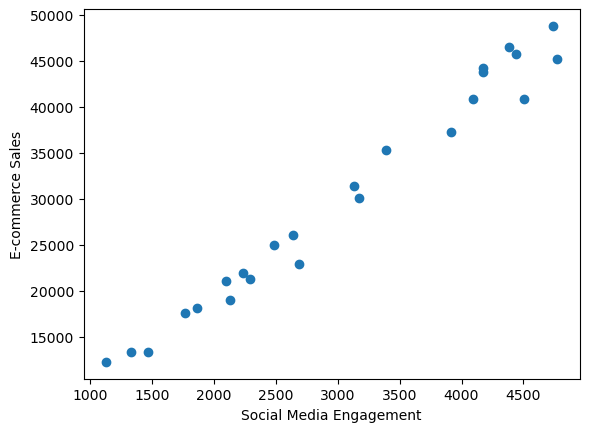

In [93]:
plt.plot(h[0],h[1],'o')
plt.ylabel('E-commerce Sales')
plt.xlabel('Social Media Engagement')

In [94]:
scipy.stats.spearmanr(h,axis=1)

SpearmanrResult(correlation=0.9765217391304346, pvalue=3.6938518126217637e-16)

In [95]:
scipy.stats.pearsonr(h[0],h[1])

PearsonRResult(statistic=0.9887172969335845, pvalue=1.2335506151432601e-19)